<a href="https://colab.research.google.com/github/ssaffiiya/ml-tasks/blob/main/%22eng_DSMA_Home_Task_3_Sentiment_Analysis_final___Khadi_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home task 3 (Sentiment Analysis)

### Deadline: 20.12 (23:59)

We will be working with the same dataset with comments under Ekaterina Shulman's and Vladimir Putin's New Year's Eve addresses. However, the source of training data is different:

- [RuSentiment: An Enriched Sentiment Analysis Dataset for Social Media in Russian](https://github.com/text-machine-lab/rusentiment) and
- [RuSentiTweet: A Sentiment Analysis Dataset of General Domain Tweets in Russian](https://github.com/sismetanin/rusentitweet)


Your task is:
1. Load the data to train the model and perform exploratory analysis.
2. Pre-process the training data and obtain a set of lemmatised texts.
3. Train a logistic regression based on the vectorised tf-idf dataset as a classifier of positive and negative comments.
4. Compare the quality of the models for the lemmatised texts (1) classifier with random prediction, 2) logistic regression based classifier, 3) logistic regression based classifier with feature engineering (the last one is optional)).
5. Load the data on which we will test the model – Ekaterina Shulman's and Vladimir Putin's New Year's Eve addresses.
6. Evaluate the negative sentiment of the comments under the two videos.
7. (Optional) Give your impressions from the application of logistic regression to the task of sentiment classification to a set of Russian texts.

Explain the choices you make in open-ended questions.


###  Task №0. Data loading

In [ ]:
import pandas as pd

In [ ]:
rusentiment = pd.read_csv('rusentiment_random_posts.csv')
rusentitweet = pd.read_csv('rusentitweet_full.csv')

In [ ]:
rusentiment

,label,text
0,negative,"А попа подозревала давно,что ты с кавказа..пер..."
1,speech,З прошедшим Днем Ангела))))))))
2,skip,Два дня до отлёта с острова!!!!!!!
3,negative,"Блин, почему эта жизнь столь не справедлива (((("
4,skip,где еще встречать свой день рождения как не на...
...,...,...
21263,neutral,"Анастасия, у меня есть друг, с которым вы хоро..."
21264,neutral,Колька пошли гулять!!?
21265,neutral,Ура! Золото дают бесплатно!Напиши это в 4 комм...
21266,speech,"С Праздником, Ксюнь! \nЖенского счастья тебе!\..."


In [ ]:
rusentitweet

,Unnamed: 0,text,label,id
0,0,@varlamov @McFaul На,skip,1327934765807308801
1,1,велл они всё равно что мусор так что ничего с...,negative,1252943181387350017
2,2,"""трезвая жизнь какая-то такая стрёмная""\r\n(с)...",negative,1323610669061677056
3,3,Ой какие неожиданные результаты 🤭 https://t.co...,neutral,1336231661160247297
4,4,@Shvonder_chief @dimsmirnov175 На заборе тоже ...,neutral,1292421736454127617
...,...,...,...,...
13387,13387,все пора спать пиздец словила шизу,negative,1310349554911457286
13388,13388,такими темпами я создам новую секту или органи...,neutral,1326638109317066752
13389,13389,"Ты смотрела аниме, завернувшись в одеяло ,пока...",neutral,1333159916505362433
13390,13390,@AlyonaPikachu Пиздануться,negative,1308341976455053312


### Task №1 (0.5 points)
Look at the distribution of labels (classes, labels) in both datasets. What can you say about the distribution? How balanced is it? Select only those labels (classes) that correspond to positive and negative comments. Calculate the proportion of these classes in both datasets.

In [ ]:
"""insert your code to calculate the frequency of occurrence of classes in two dataframes"""

'insert your code to calculate the frequency of occurrence of classes in two dataframes'

In [ ]:
rusentiment.label.value_counts()

,count
label,
neutral,8323
positive,4635
skip,3190
speech,2826
negative,2294


there is an imbalance of classes, with the neutral class far outnumbering the others

In [ ]:
rusentiment_positive_negative = rusentiment[rusentiment['label'].isin(['positive', 'negative'])]
rusentiment_positive_negative.label.value_counts(normalize=True)

,proportion
label,
positive,0.668928
negative,0.331072


In [ ]:
rusentitweet.label.value_counts()

,count
label,
neutral,5341
negative,3298
positive,2414
skip,1843
speech,496


there is an imbalance of classes, the neutral class is much more prevalent than others, there are also very few lines with the value speech
 which can negatively affect the model

In [ ]:
rusentitweet_positive_negative = rusentitweet[rusentitweet['label'].isin(['positive', 'negative'])]
rusentitweet_positive_negative.label.value_counts(normalize=True)

,proportion
label,
negative,0.577381
positive,0.422619


In [ ]:
"""insert your code to calculate the frequency of occurrence of classes in two dataframes"""


'insert your code to calculate the frequency of occurrence of classes in two dataframes'

### Task №2 (0.5 points)

Use the `word_count` function below to count the frequency of tokens in `rusentiment` texts. The `word_count` function should return the number of tokens (list length) after splitting the original text using the `.split()` method


Then use the `matplotlib` library to visualise the number of positive and negative tokens separately.

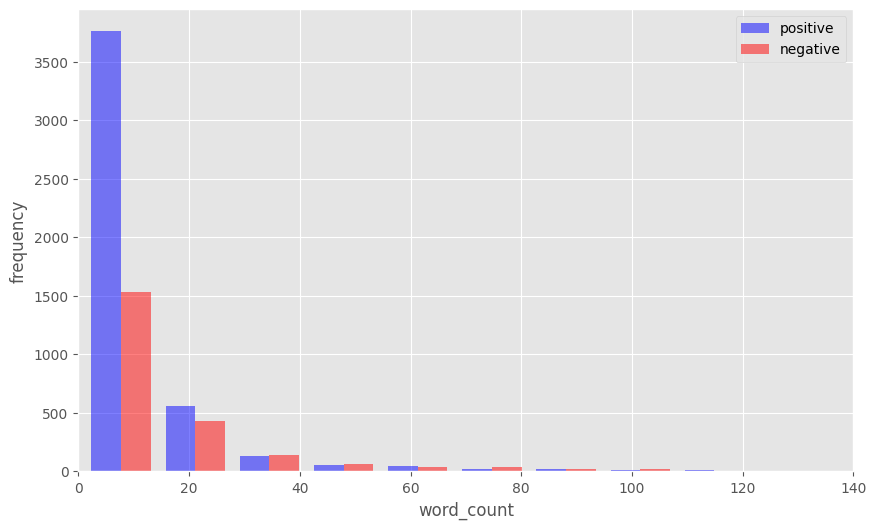

In [ ]:
import matplotlib.pyplot as plt

# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())

rusentiment['word_count'] = rusentiment['text'].apply(word_count)
rusentiment.head(3)

# show frequency distributions for positive and negative sentiments
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option("display.max_colwidth", 200)
x= rusentiment['word_count'][(rusentiment['label'] == 'positive').sort_values()]
y = rusentiment['word_count'][(rusentiment['label'] == 'negative').sort_values()]# sort only negative tweets
plt.xlim(0,140)
plt.xlabel('word_count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['b','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right');




Repeat the same for the second `rusentitweet` dataset. Compare the results. What problems with the distribution relative to tweet length did you notice?

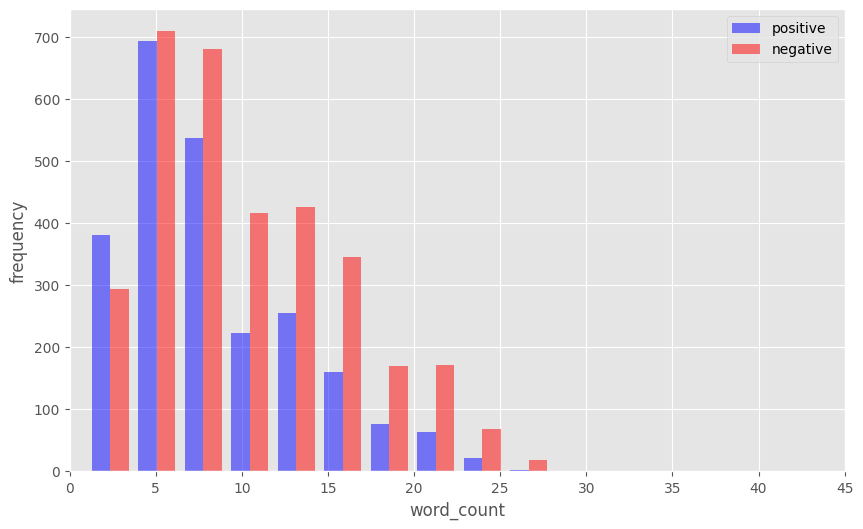

In [ ]:
rusentitweet['word_count'] = rusentitweet['text'].apply(word_count)
rusentitweet.head(3)

# show frequency distributions for positive and negative sentiments
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option("display.max_colwidth", 200)
x = rusentitweet['word_count'][(rusentitweet['label'] == 'positive').sort_values()]
y = rusentitweet['word_count'][(rusentitweet['label'] == 'negative').sort_values()]# sort only negative tweets
plt.xlim(0,45)
plt.xlabel('word_count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['b','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right');



For each dataset, count the top 10 words by their occurrence. Use the `Counter` module from the `collections` library, which will sum up all identical items in the list.

In [ ]:
from collections import Counter

all_words1 = []
for line in list(rusentiment['text']):

    words = line.lower().split()
    all_words1.extend(words)

Counter(all_words1).most_common(10)

[('и', 7085),
 ('в', 5955),
 ('не', 4672),
 ('с', 4428),
 ('на', 3800),
 ('я', 3592),
 ('-', 2644),
 ('что', 2275),
 ('а', 1963),
 ('ты', 1808)]

In [ ]:
from collections import Counter

all_words2 = []
for line in list(rusentitweet['text']):

    words = line.lower().split()
    all_words2.extend(words)

Counter(all_words2).most_common(10)

[('я', 2642),
 ('не', 2279),
 ('в', 2247),
 ('и', 2117),
 ('что', 1401),
 ('на', 1345),
 ('это', 1053),
 ('а', 1023),
 ('с', 953),
 ('как', 774)]

You can use this code cell here for visualisation:

<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

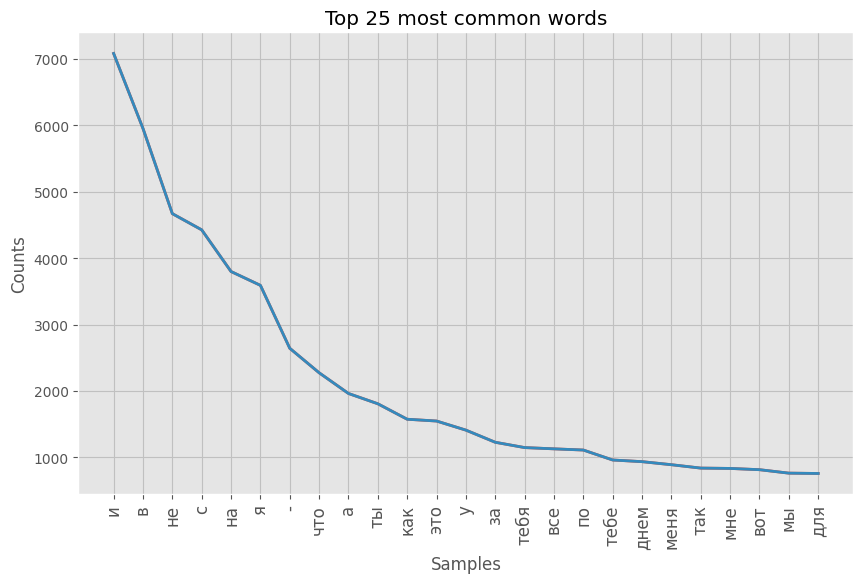

In [ ]:
import nltk

# plot word frequency distribution of first few words
plt.title('Top 25 most common words')
plt.xticks(fontsize=12, rotation=90)
fd1 = nltk.FreqDist(all_words1)
fd2 = nltk.FreqDist(all_words1)
fd1.plot(25,cumulative=False)
fd2.plot(25,cumulative=False)

<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

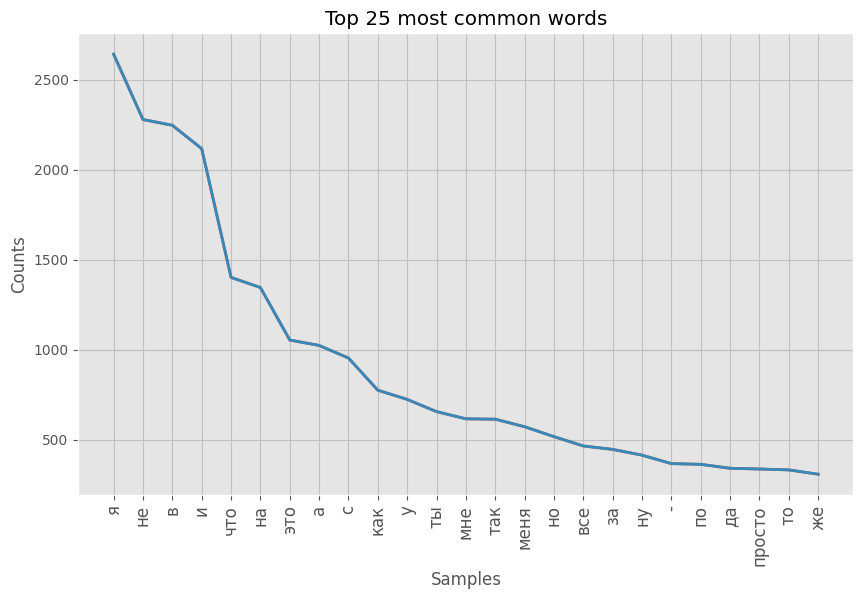

In [ ]:
plt.title('Top 25 most common words')
plt.xticks(fontsize=12, rotation=90)
fd1 = nltk.FreqDist(all_words2)
fd2 = nltk.FreqDist(all_words2)
fd1.plot(25,cumulative=False)
fd2.plot(25,cumulative=False)

### Task №3 (0.5 points)
From the `rusentiment` dataset, pull out the `text` column. Create two new dataframes – one with a `text` column for positive tweets (positive_sentiment), and one with a `text` column for negative tweets (negative_sentiment). You can *check if the label is positive/negative* and pull the column you're looking for using the `.iloc[:, 1]` method.

In [ ]:
positive_sentiment = pd.DataFrame(rusentiment[rusentiment['label'] == 'positive'].iloc[:, 1])
negative_sentiment = pd.DataFrame(rusentiment[rusentiment['label'] == 'negative'].iloc[:, 1])


Add a column with the classes your classifier will use - 0 for negative tweets and 1 for positive tweets.

In [ ]:
positive_sentiment['label'] = 1
negative_sentiment['label'] = 0

Merge the two dataframes and update the index of the resulting dataframe so that all observations are ranked from 0 to N.

In [ ]:
labeled_sentiments = pd.concat([positive_sentiment,negative_sentiment])
labeled_sentiments.index = range(len(labeled_sentiments))
labeled_sentiments

,text,label
0,патамушта я крутая баба! ееее!!,1
1,урря!я дождался этой овцыы),1
2,Наша гордость !,1
3,ТЫ МОЕ МАЛЕНЬКОЕ СЧАСТЬЕ !!!!!!! Я ТЕБЯ ЛЮБЛЮ ОЧЕНЬ СИЛЬНО !!!!!!!!!,1
4,В этом﻿ ролике прекрасно абсолютно всё.,1
...,...,...
6924,"земля снегом укуталась...\nей как и мне холодно,\nона тоже запуталась...\nмое сердце так голодно.\n\nи эта нехватка реальности\nдобивает остатки души моей.\nустала от этой буквальности - \nне жди ...",0
6925,"Говорят, что сильные не плачут\nГоворят, им нипочем гроза...\nПросто эти люди часто прячут\nКрасные от слез глаза...\n\nГоворят, что сильные все могут,\nЖить без теплых слов и без любви...\nПросто...",0
6926,Выходные??? Не знаю...Не пробывал....,0
6927,"Ты понимаешь, что твой статус абсолютно бессмысленный. это непереводимо!",0


### Task №4 (0.5 points)

Do the same steps as in the previous task for `rusentitweet`.

In [ ]:
positive_tweet = pd.DataFrame(rusentitweet[rusentitweet['label'] == 'positive'].iloc[:, 1])
negative_tweet =  pd.DataFrame(rusentitweet[rusentitweet['label'] == 'negative'].iloc[:, 1])

positive_tweet['label'] = 1
negative_tweet['label'] = 0

negative_tweet.head()

,text,label
1,велл они всё равно что мусор так что ничего страшного 🤣,0
2,"""трезвая жизнь какая-то такая стрёмная""\r\n(с) артём azrtusa",0
9,"@Ladyzchensk Цыган , хуле ...",0
15,@ZippinkC @lenny_lanzz ПЛАЧУ,0
20,"@bLianaaaa Я також творю хуйню, тому давай творити хуйню разом🤝",0


In [ ]:
labeled_tweets = pd.concat([positive_tweet,negative_tweet])
labeled_tweets.index = range(len(labeled_tweets))
labeled_tweets.head()

,text,label
0,@BTS_twt ты такой красивый 😭😭😭🥺💓,1
1,@okdaa @wifeyoonminn @Y_Yoon_ Но ты очень красиво и чувственно пишешь(,1
2,@Susanoo51489064 ВХВХВХ,1
3,@yoursungshine малышка спи сладко ❤,1
4,как же я люблю титьки https://t.co/C2M8rMDFyc,1


### Task №5 (rusentiment vs rusentitweet) (0.5 points)
Compare the two dataframes rusentiment and rusentitweet - what are their differences and similarities? Which one might be more useful for the sentiment analysis?

In [ ]:
labeled_tweets.dtypes , labeled_sentiments.dtypes

(text     object
 label     int64
 dtype: object,
 text     object
 label     int64
 dtype: object)

In [ ]:
labeled_tweets.head(5),labeled_sentiments.head(5)

(                                                                     text  \
 0                                        @BTS_twt ты такой красивый 😭😭😭🥺💓   
 1  @okdaa @wifeyoonminn @Y_Yoon_ Но ты очень красиво и чувственно пишешь(   
 2                                                 @Susanoo51489064 ВХВХВХ   
 3                                     @yoursungshine малышка спи сладко ❤   
 4                          как же я люблю титьки  https://t.co/C2M8rMDFyc   
 
    label  
 0      1  
 1      1  
 2      1  
 3      1  
 4      1  ,
                                                                    text  label
 0                                       патамушта я крутая баба! ееее!!      1
 1                                           урря!я дождался этой овцыы)      1
 2                                                       Наша гордость !      1
 3  ТЫ МОЕ МАЛЕНЬКОЕ СЧАСТЬЕ !!!!!!! Я ТЕБЯ ЛЮБЛЮ ОЧЕНЬ СИЛЬНО !!!!!!!!!      1
 4                               В этом﻿ ролике прекрасно

In [ ]:
labeled_tweets.shape,labeled_sentiments.shape

((5712, 2), (6929, 2))

In [ ]:
labeled_tweets.label.value_counts(),labeled_sentiments.label.value_counts()

(label
 0    3298
 1    2414
 Name: count, dtype: int64,
 label
 1    4635
 0    2294
 Name: count, dtype: int64)

different length and distribution of classes, but the same data types

### Task №6 (0.5 points)
Merge the two dataframes and update the indexing so that observations are indexed from 0 to N.

In [ ]:
joned_text = pd.concat([labeled_sentiments,labeled_tweets])

joned_text.index = range(len(joned_text))
joned_text.head(10)

,text,label
0,патамушта я крутая баба! ееее!!,1
1,урря!я дождался этой овцыы),1
2,Наша гордость !,1
3,ТЫ МОЕ МАЛЕНЬКОЕ СЧАСТЬЕ !!!!!!! Я ТЕБЯ ЛЮБЛЮ ОЧЕНЬ СИЛЬНО !!!!!!!!!,1
4,В этом﻿ ролике прекрасно абсолютно всё.,1
5,Гопник на деревне. Разбить бутылку монетой. А вам слабо?,1
6,Сказочный мир),1
7,Ыыыы)))Мне снова кто-то пополнил счёт))))),1
8,"хах,...витаминчики)))**",1
9,"Финал ББешечки, красиво стильно",1


### Task №7 (1 point)
Create a text cleanup function where non-Cyrillic characters are replaced by an empty space and stopwords are removed. Lemmatise (`lemmatize`) the cleaned text inside the function using `MorphAnalyzer()`. Apply your function to a dataframe column with texts.


In [ ]:
pip install  pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 56.6 MB/s eta 0:00:00


In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords
patterns = r'[^А-Яа-яЁё\s]'
stopwords_ru = set(stopwords.words('russian'))
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.parse(token)[0].normal_form
            tokens.append(token)
    if len(tokens) >= 1:
        return " ".join(tokens)
    return None
joned_text['text_lemmatized'] = joned_text['text'].apply(lemmatize)


### Task №8 (0.5 points)
Check whether missing values have appeared as a result of the lemmatisation. Delete if so.

In [ ]:
joned_text.isnull().sum()

,0
text,0
label,0
text_lemmatized,23


In [ ]:
"""insert code to check and remove empty lines"""

'insert code to check and remove empty lines'

In [ ]:
joned_text = joned_text.dropna(subset=['text_lemmatized'])
joned_text.reset_index(drop=True, inplace=True)

In [ ]:
joned_text.isnull().sum()

,0
text,0
label,0
text_lemmatized,0


In [ ]:
joned_text.label.value_counts()

,count
label,
1,7033
0,5585


In [ ]:
joned_text.label.value_counts()

,count
label,
1,7033
0,5585


To change the content of a cell, double-click on it (or select ‘Enter’)

### Task №9 (0.5 points)
Using the `train_test_split` module (function) of the `sklearn.model_selection` library, split the sample into two parts - in the proportion of 20/80. Set `12348` as the random_state attribute

Compare the distribution of the target attribute in the training and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
"""insert your code to load the library"""
#split the sample into a test and a training sample
train, test = train_test_split(joned_text,
                        test_size = 0.2,
                        random_state = 12348,
                       )

print(train.shape)
print(test.shape)

(10094, 3)
(2524, 3)


In [ ]:
"""insert your code to compare the target feature in the training and test datasets"""

In [ ]:
train['label'].value_counts()

,count
label,
1,5622
0,4472


In [ ]:
test['label'].value_counts()

,count
label,
1,1411
0,1113


### Task №10 (1 point)
Train tf-idf vectorizer on the training sample separately for positive and negative tweets. Save the training results to the `tf_idf_positive` and `tf_idf_negative` variables

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_tfidf_positive = TfidfVectorizer()
count_tfidf_negative = TfidfVectorizer()

tf_idf_positive = count_tfidf_positive.fit_transform(train[train['label'] == 1]['text_lemmatized'])
tf_idf_negative = count_tfidf_negative.fit_transform(train[train['label'] == 0]['text_lemmatized'])

In [ ]:
train[train['label'] == 0].head(5)

,text,label,text_lemmatized
11250,"США перебрасывают войска в Ирак, чтобы атаковать проиранских боевиков https://t.co/B3UZlrQUXJ",0,сша перебрасывать войско ирак атаковать проиранский боевик
5533,"Купила кучу мандаринов,а они все кислючие(((((((Брррррр",0,купить куча мандарин кислючий брррррра
4700,"Никогда не думал, что будет так тяжело расставаться. Впереди ещё 8 месяцев..",0,никогда думать тяжело расставаться впереди ещё месяц
5831,"я тебя сломаю,придуурок!",0,сломать придуурок
6013,"Иногда кажется, что друзей нет.",0,иногда казаться друг


In [ ]:
train[train['label'] == 0].head(5)

,text,label,text_lemmatized
11250,"США перебрасывают войска в Ирак, чтобы атаковать проиранских боевиков https://t.co/B3UZlrQUXJ",0,сша перебрасывать войско ирак атаковать проиранский боевик
5533,"Купила кучу мандаринов,а они все кислючие(((((((Брррррр",0,купить куча мандарин кислючий брррррра
4700,"Никогда не думал, что будет так тяжело расставаться. Впереди ещё 8 месяцев..",0,никогда думать тяжело расставаться впереди ещё месяц
5831,"я тебя сломаю,придуурок!",0,сломать придуурок
6013,"Иногда кажется, что друзей нет.",0,иногда казаться друг


Rank positive and negative words by importance (TF-IDF metric)

In [ ]:
count_tfidf_positive.get_feature_names_out()

array(['аа', 'ааа', 'аааа', ..., 'ёпт', 'ёпть', 'ёхххоооуууа'],
      dtype=object)

In [ ]:
count_tfidf_negative.get_feature_names_out()

array(['аа', 'ааа', 'аааа', ..., 'ёпттвоюмать', 'ёрничать', 'ёта'],
      dtype=object)

In [ ]:
positive_importance = pd.DataFrame({
    'word': count_tfidf_positive.get_feature_names_out(),
    'idf': count_tfidf_positive.idf_
}).sort_values(by='idf', ascending=False)

negative_importance = pd.DataFrame({
    'word': count_tfidf_negative.get_feature_names_out(),
    'idf': count_tfidf_negative.idf_
}).sort_values(by='idf', ascending=False)


In [ ]:
positive_importance.head()

,word,idf
4543,обвораживать,8.941473
5375,пленять,8.941473
5392,плюшка,8.941473
5391,плюшевый,8.941473
5390,плюсовать,8.941473


In [ ]:
negative_importance.head()

,word,idf
10016,ёта,8.712667
7995,снаружи,8.712667
4554,насчитать,8.712667
8016,собирание,8.712667
8019,соблазняться,8.712667


In [ ]:
count_tfidf_positive.idf_

array([8.53600832, 8.24832625, 7.14971396, ..., 8.24832625, 8.94147343,
       8.94147343])

In [ ]:
count_tfidf_negative.idf_

array([8.30720231, 8.30720231, 7.79637669, ..., 8.71266742, 8.71266742,
       8.71266742])

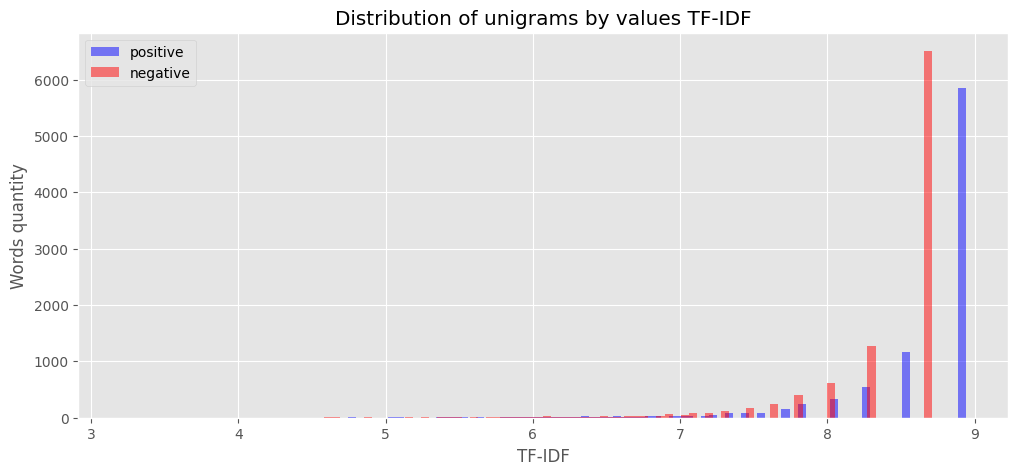

In [ ]:
fig = plt.figure(figsize = (12,5))
plt.hist(count_tfidf_positive.idf_,bins = 100,
                             label = 'positive',
                             alpha = 0.5,
                             color = 'b',
                            )
plt.hist(count_tfidf_negative.idf_,bins = 100,
                             label = 'negative',
                             alpha = 0.5,
                             color = 'r',
                            )
plt.title('Distribution of unigrams by values TF-IDF')
plt.xlabel('TF-IDF')
plt.ylabel('Words quantity')
plt.legend()
plt.show()

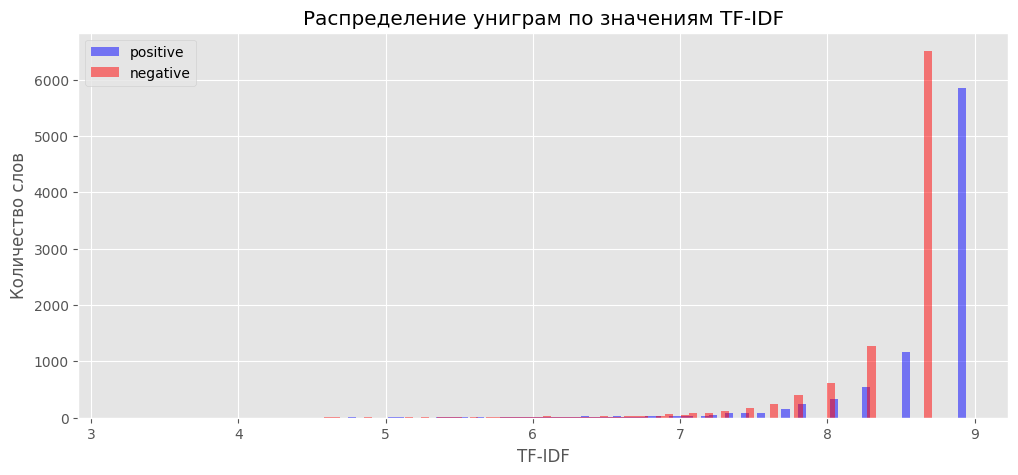

In [ ]:
fig = plt.figure(figsize = (12,5))
plt.hist(count_tfidf_positive.idf_,bins = 100,
                             label = 'positive',
                             alpha = 0.5,
                             color = 'b',
                            )
plt.hist(count_tfidf_negative.idf_,bins = 100,
                             label = 'negative',
                             alpha = 0.5,
                             color = 'r',
                            )
plt.title('Distribution of unigrams by values TF-IDF')
plt.xlabel('TF-IDF')
plt.ylabel('Words quantity')
plt.legend()
plt.show()

### Task 11 (0.5 points)

Get vector representations of tweets for the whole sample (tf_idf_base_1), the training part (tf_idf_train_base_1) and the test part (tf_idf_test_base_1).

In [ ]:
# Let's obtain vector representations of texts
count_idf_1 = TfidfVectorizer()

tf_idf_base_1 = count_idf_1.fit_transform(joned_text['text_lemmatized'])
tf_idf_train_base_1 = count_idf_1.transform(train['text_lemmatized'])
tf_idf_test_base_1 =count_idf_1.transform(test['text_lemmatized'])

Train logistic regression on training data using `random_state = 12345`

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr_base_1 = LogisticRegression(random_state=12345)

In [ ]:
model_lr_base_1.fit(tf_idf_train_base_1, train['label'])

LogisticRegression(random_state=12345)

Obtain the predicted probabilities of belonging to negative and positive classes (the first column is negative class (0), the second column is positive (1)). Compare the predictions with the actual texts. In your opinion, how well did the classifier perform?

Hint: if Russian is not your native language, translate only examples of sentences. There is no need to translate all the dataset.

In [ ]:
predict_lr_base_proba = model_lr_base_1.predict_proba(tf_idf_test_base_1)
predict_lr_base_proba[0:10]

array([[0.2112395 , 0.7887605 ],
       [0.47121299, 0.52878701],
       [0.64948866, 0.35051134],
       [0.78030279, 0.21969721],
       [0.39094311, 0.60905689],
       [0.90356474, 0.09643526],
       [0.68271408, 0.31728592],
       [0.81463174, 0.18536826],
       [0.53152342, 0.46847658],
       [0.59682824, 0.40317176]])

In [ ]:
test[0:10]

,text,label,text_lemmatized
3369,"Ты моя подруга, мы с тобой друзья.\nТы такая дура, прямо как и я.xD",1,ты подруга ты друг ты такой дура прямо
6905,ммм2011 и ммм2012 обман ни один мой вклад не разу не выплатили что ммм2011 что ммм2012 так что думайте как всем все платится!!!!!!!!!!!,0,ммм ммм обман вклад раз выплатить ммм ммм думать весь платиться
5181,потому что я скучаю:(,0,скучать
4988,ненавижу МИРЭА,0,ненавидеть мирэ
8120,Моя мама фотограф от Бога и не спорьте со мной https://t.co/fTc1DzY3eF,1,мой мама фотограф бог спорить я
12032,@melvaskyd Мы убирались и не умерли. В чем проблема? \r\nКакие бля дети ебанутые,0,мы убираться умереть в проблема какой бля ребёнок ебануть
12443,@stkrasn надо будет увы,0,увы
10846,"у нее буквально такой же телефон, как у меня, и пока у меня с ним ноль проблем, у нее их ебаный вагон, КАК",0,буквально телефон пока ноль проблема ёбаный вагон как
6499,"Походу или ушиб или надломил ребро справа. Уродский год.\n""Как встретишь - так и проведешь"". Кол-во случаев калечения зашкаливает за этот год.\nТошно и злобно. ""13"" не мое не счастливое. Просто об...",0,поход ушибить надломить ребро справа уродский год как встретить провести кол случай калечение зашкаливать год тошный злобно мой счастливый просто обидно но жена сказать ребро пропороть орган день ...
1447,Последняя смена!!!!и все)))))))),1,последний смена


Overall it works well, but the values are close for neutrally colored messages

### Task 12 (0.5 points)
Compare the resulting classifier with the classifier based on coin flipping (coin_classifier). Use the AUC-ROC graph for interpretation. Interpret the confusion matrix. How well did the model perform on the prediction?

In [ ]:
import numpy as np

"""your code for writing a coin_classifier that randomly predicts a sentiment"""
def coin_classifier(test_data):
    return np.random.uniform(0, 1, size=len(test_data))

In [ ]:
coin_predict = coin_classifier(predict_lr_base_proba)

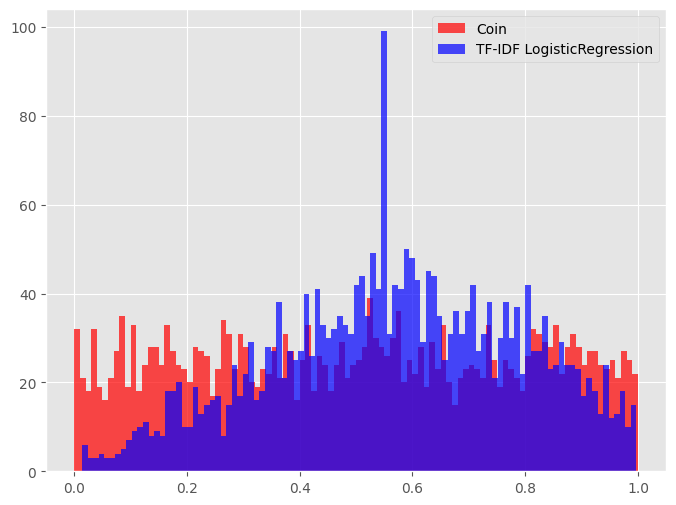

In [ ]:
fif = plt.figure(figsize = (8, 6))

pd.Series(coin_predict)\
                .hist(bins = 100,
                      alpha = 0.7,
                      color = 'r',
                      label = 'Coin'
                     )

pd.Series(predict_lr_base_proba[:, 1])\
                .hist(bins = 100,
                      alpha = 0.7,
                      color = 'b',
                      label = 'TF-IDF LogisticRegression'
                     )
plt.legend()
plt.show()

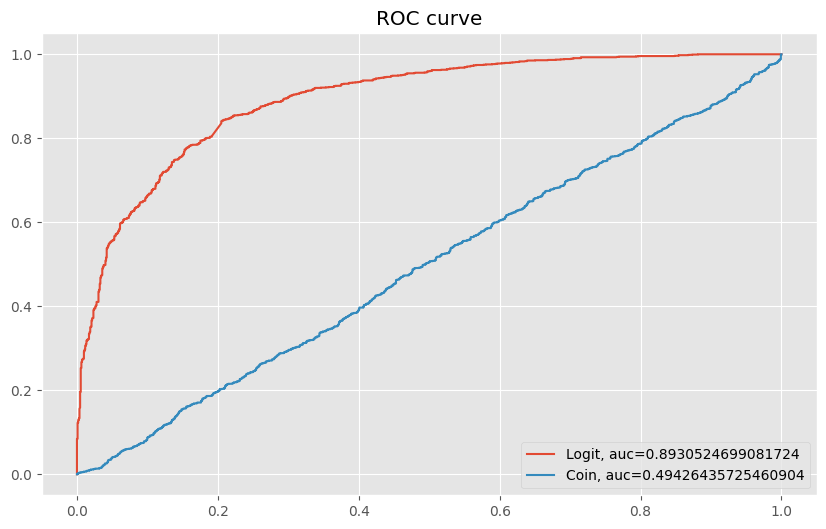

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import *

fpr_base, tpr_base, _ = roc_curve(test['label'], predict_lr_base_proba[:, 1])
roc_auc_base = auc(fpr_base, tpr_base)


fpr_coin, tpr_coin, _ = roc_curve(test['label'], coin_predict)
roc_auc_coin = auc(fpr_coin, tpr_coin)

plt.plot(fpr_base,tpr_base,label="Logit, auc="+str(roc_auc_base))
plt.plot(fpr_coin,tpr_coin,label="Coin, auc="+str(roc_auc_coin))
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()


In [ ]:
# Output the error matrices
confusion_matrix(test['label'],
                 (predict_lr_base_proba[:, 1] > 0.5).astype('float'),
                 normalize='true',
                )

array([[0.69451932, 0.30548068],
       [0.09709426, 0.90290574]])

0.69451932: This represents the proportion of actual negative (label 0) instances that were correctly predicted as negative by the model. This is the True Negative Rate (TNR) or Specificity.
0.30548068: This represents the proportion of actual negative instances that were incorrectly predicted as positive (false positives). This is the False Positive Rate (FPR).
0.09709426: This represents the proportion of actual positive (label 1) instances that were incorrectly predicted as negative (false negatives). This is the False Negative Rate (FNR).
0.90290574: This represents the proportion of actual positive instances that were correctly predicted as positive (True Positives). This is the True Positive Rate (TPR) or Sensitivity.
The classifier is effective at identifying positive sentiment, with very high sensitivity (90.29%) and decent precision (75%).
However, it suffers from a relatively high false positive rate, meaning that it sometimes incorrectly predicts negatives as positives. Additionally, the recall for negatives could be improved.

Find the optimal threshold value of the classifier. We find such a value at which both classes are prescaled as correctly as possible. What does it mean that the optimal threshold is below 0.5?

### Task 13 (1 point)
Obtain **feature weights** and sort the features that are most important to assign to both positive and negative classes. How intuitively do these features seem appropriate for assigning a comment to a sentiment class?



In [ ]:
# We get the feature weights, that is, the multipliers
# selected by logistic regression
# for each component of the tf-idf vector

weights = model_lr_base_1.coef_.ravel()
weights_min =np.argsort(weights)[:100]
weights_max =np.argsort(weights)[-100:]

In [ ]:
negative_df = pd.DataFrame({
    'word':count_idf_1.get_feature_names_out()[weights_min],
    'weight':(-1) *weights[weights_min]
})

In [ ]:
negative_df

,word,weight
0,блядь,4.378014
1,нахуй,3.661987
2,сука,3.459148
3,пиздец,3.421751
4,умереть,2.806565
...,...,...
95,больной,1.219269
96,дура,1.216348
97,удалить,1.202069
98,слишком,1.199765


In [ ]:
positive_df = pd.DataFrame({
    'word':count_idf_1.get_feature_names_out()[weights_max],
    'weight':weights[weights_max]
})

In [ ]:
positive_df

,word,weight
0,ха,1.248644
1,зая,1.253746
2,зато,1.254901
3,подарить,1.258195
4,фотка,1.258875
...,...,...
95,крутой,3.169056
96,классный,3.306784
97,любимый,3.422521
98,хороший,4.023605


In [ ]:
"""Use wordcloud library to generate word clouds for top 100 positive and negative reviews"""

In [ ]:
from wordcloud import WordCloud

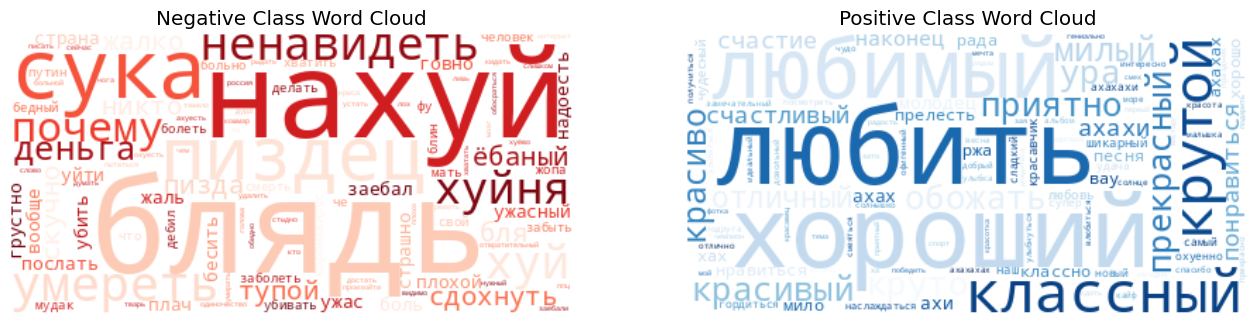

In [ ]:
negative_wordcloud = WordCloud(background_color='white', colormap='Reds').generate_from_frequencies(dict(zip(negative_df['word'], negative_df['weight'])))
positive_wordcloud = WordCloud(background_color='white', colormap='Blues').generate_from_frequencies(dict(zip(positive_df['word'], positive_df['weight'])))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Class Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Class Word Cloud")

plt.show()

While it is convenient to use a word cloud in the presentation, it is better to use graphs in the text. For rxample:

In [ ]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );

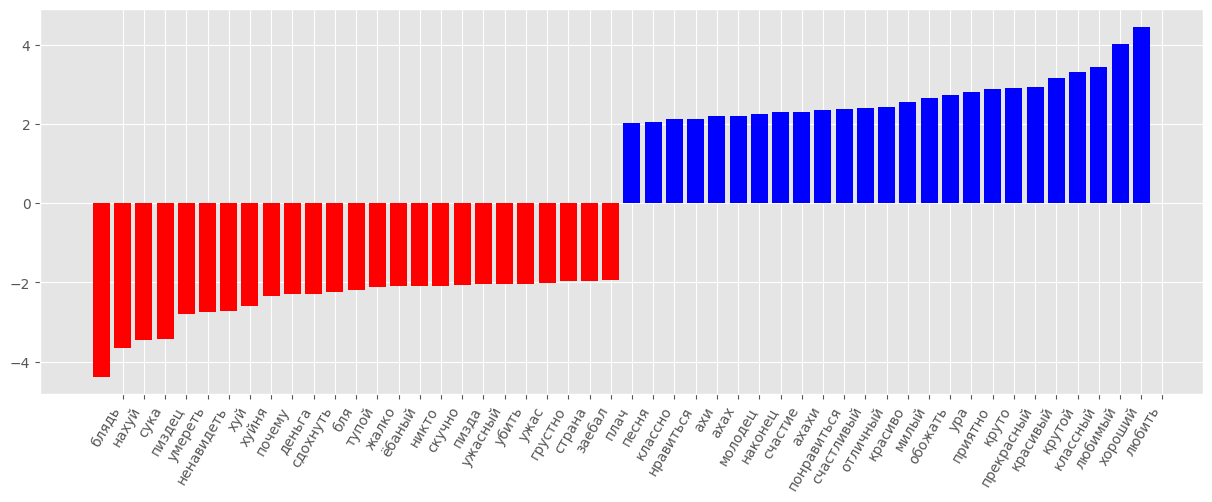

In [ ]:
visualize_coefficients(model_lr_base_1, count_idf_1.get_feature_names_out())

### Task 14 (optional)
Plot a histogram of the significance of the words. Using this histogram, determine the lower and upper threshold for the informativeness of the features. Reduce the dimensionality of the feature space by using uninformative words.


In [ ]:
"""your code for the significance of the words histogram"""

In [ ]:
n_positive = "your positive threshold of informativeness"
n_negative = "вyour negative threshold of informativeness"
weights_filtered = weights[weights['weights'] != 0]
print(weights_filtered)
weights_uninformative = weights_filtered[(weights_filtered['weights'] < n_positive) & (weights_filtered['weights'] > n_negative)]
print(weights_uninformative)

             words   weights
0               аа  0.002670
1              ааа  0.313502
2             аааа  0.585290
3            ааааа -0.107093
4           аааааа  0.650163
...            ...       ...
17684  ёпттвоюмать -0.255118
17685         ёпть  0.077740
17686     ёрничать -0.341990
17687          ёта -0.230883
17688  ёхххоооуууа  0.262997

[15385 rows x 2 columns]
             words   weights
0               аа  0.002670
8      ааааааааааа -0.015887
20         ааауеий  0.032436
39            ааый  0.046663
47           абрам  0.021154
...            ...       ...
17619           ян  0.007467
17639         ярик  0.017400
17641         ярко  0.023314
17657         яхта  0.002563
17672      ёбанный -0.039984

[1751 rows x 2 columns]


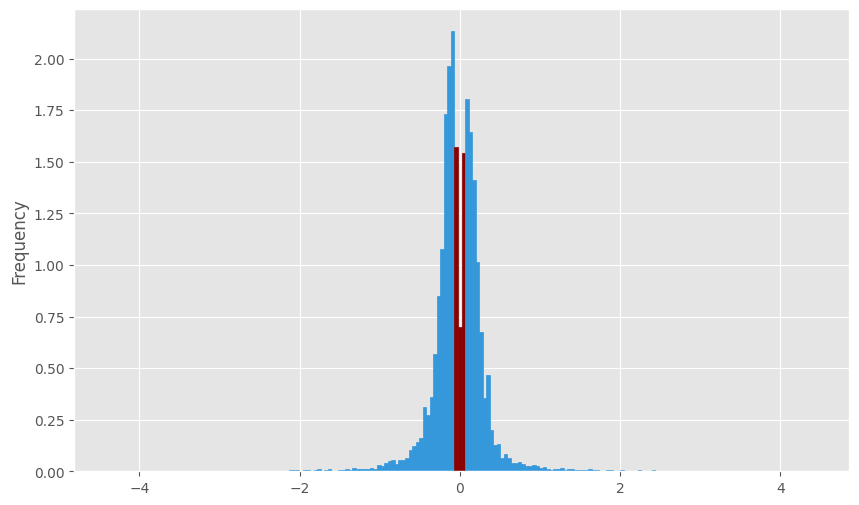

In [ ]:
from matplotlib import colors
n_bins = 200
ax = "weights column from the weights dataframe".plot.hist(bins=n_bins, density=True)

for bar in ax.containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x > n_positive or x < n_negative:
        bar.set_color('#3498db')
    else:
        bar.set_color('darkred')


### Task 15 (optional)
Do the same analysis with the reduced feature space. How much did the reduced feature space affect the quality of the model? Confirm what you say with the AUC-ROC plot and the new error matrix.

random_state = 12345 for logit regression

In [ ]:
vocab_005 = """code for filtering the most informative words by the cut-off criterion you select"""
count_idf = """code"""

tf_idf = """code"""

tf_idf_train = """code"""
tf_idf_test = """code"""

model_lr_base = """code"""

model_lr_base.fit("""code""")


predict_lr_base_proba_1 = """code"""

fpr_base_1, tpr_base_1, _ = """code"""
roc_auc_base_1 = auc("""code""")

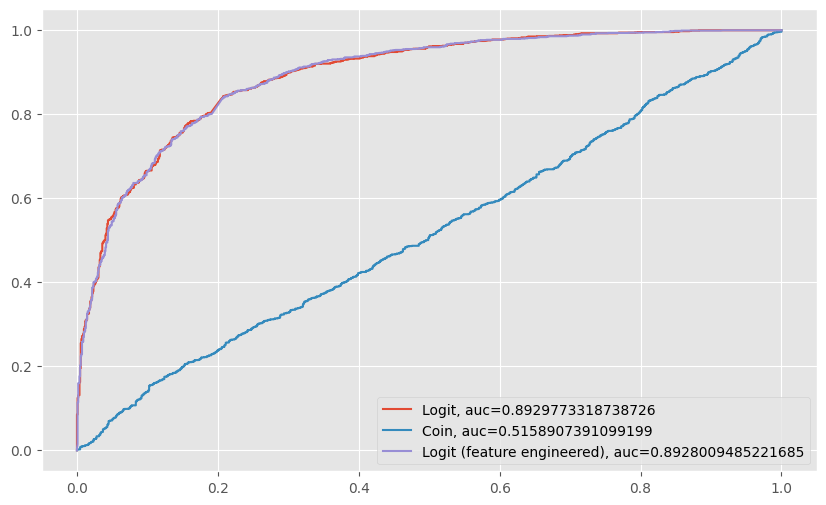

In [ ]:
"""code to visualise the ROC curve for the original logit model,
coin classifier and logit model on a reduced feature space"""

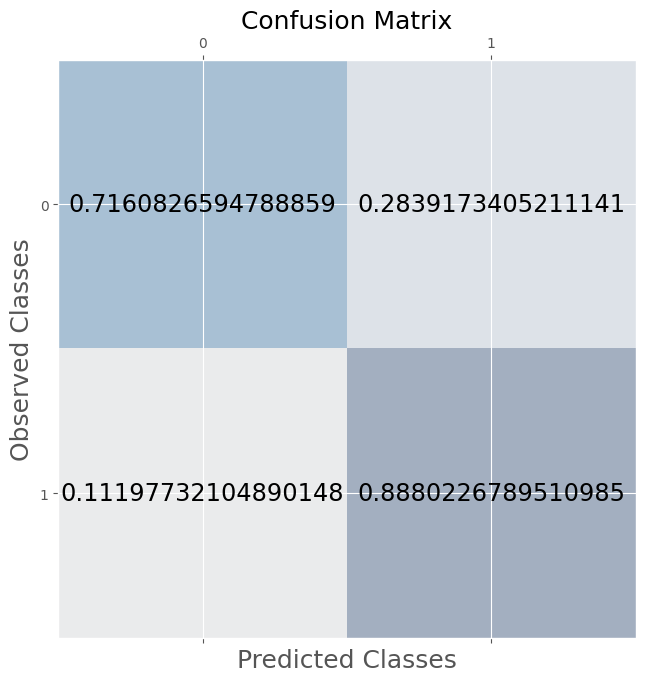

In [ ]:
conf_matrix = confusion_matrix(y_true=test['label'],
                 y_pred = (predict_lr_base_proba_1[:, 0] <  """thrashold for classification""").astype('int'),
                 normalize='true')

# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predicted Classes', fontsize=18)
plt.ylabel('Observed Classes', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Task 16 (2 points)

Use the trained model to predict the sentiment of comments on the comments under Putin's and Shulman's addresses.

* Download data for analysis.
* Perform necessary data preparation – clean missing values.
* Pre-process the texts.
* Lemmatise the texts with the same `lemmatize' function that was applied to the corpus on which we trained the model.
* Vectorise the resulting comments.
* Create a list with the most important words for the two figures, visualise with a word cloud.
* Draw a distribution graph of the negative class membership of the comments. Add the mean and median.
* Draw meaningful conclusions, evaluate how well the classifier performed. Compare with the results we got in the workshop.

In [ ]:
comments_putin_df = pd.read_csv('comments_putin.csv')
comments_shulman_df = pd.read_csv('comments_shulman.csv')

In [ ]:
comments_putin_df

,Unnamed: 0,comment
0,0,Народ тебя никогда не забудет
1,1,"Желаю путину всего того , что он сделал для народа !!! Очень искренне"
2,2,"Зашёл сюда не послушать, а почитать! Сильно улыбнуло)))"
3,3,"2046 год. Путин: ""Год был непростым, прошу отнестись с пониманием. Я очень устал, но я остаюсь с вами. Над страной нависла опасность, и только я ее могу спасти и не отдать врагам"""
4,4,"Я ждал что он скажет ""уходящий год был непростым"")))"
...,...,...
3339,3339,Лучший президент России
3340,3340,Благослови навеки Путина и Россию!
3341,3341,В коментах вижувсе недовольные. Так идите работать тунеядцы сидят манну небесную ждут
3342,3342,Сами лучи президента России.


In [ ]:
comments_shulman_df

,Unnamed: 0,comment
0,0,Новогоднее обращение которое приятно смотреть! Спасибо Вам Екатерина Михайловна! Удачи Вам в Новом году
1,1,"С Новым годом, Екатерина Михайловна!!! Вы - лучшее, что случалось с нами в этом тяжёлом 2021"
2,2,"Невероятная умница Екатерина! Дарит крылья, силу, веру в себя и оптимизм! Спасибо Вам! И наилучшие пожелания! За Вами хочется идти!"
3,3,"С Новым годом, уважаемая Екатерина Михайловна! Спасибо вам за вашу деятельность. Желаю здоровья и счастья вам и вашим близким"
4,4,"В этом году я открыла для себя вас, Екатерина Михайловна. Это лучшее открытие года. Спасибо️"
...,...,...
2249,2249,"Вам предстоит побороться с Алексеем Анатольевичем за пост президента РФ, не думайте что так просто всё будет!"
2250,2250,Екатерину Михайловну в президенты! Ура! У сновым годом! Спасибо вам за ваш труд и красоту ️
2251,2251,"Ну вот это я понимаю. Куда приятнее видеть такое лицо на новогоднем обращении, а не вот то вот все."
2252,2252,С Новым годищщем! Это же будет интересный год)


In [ ]:
comments_putin_df .dropna(subset=['comment'], inplace=True)
comments_shulman_df .dropna(subset=['comment'], inplace=True)

In [ ]:
comments_putin_df ['comment_lemmatized'] = comments_putin_df ['comment'].apply(lemmatize)
comments_shulman_df ['comment_lemmatized'] = comments_shulman_df ['comment'].apply(lemmatize)


In [ ]:
comments_putin_df.head(5)

,Unnamed: 0,comment,comment_lemmatized
0,0,Народ тебя никогда не забудет,народ забыть
1,1,"Желаю путину всего того , что он сделал для народа !!! Очень искренне",желать путин сделать народ очень искренне
2,2,"Зашёл сюда не послушать, а почитать! Сильно улыбнуло)))",зайти сюда послушать почитать сильно улыбнуть
3,3,"2046 год. Путин: ""Год был непростым, прошу отнестись с пониманием. Я очень устал, но я остаюсь с вами. Над страной нависла опасность, и только я ее могу спасти и не отдать врагам""",год путин год непростой просить отнестись понимание я очень устать оставаться вы над страна нависнуть опасность мочь спасти отдать враг
4,4,"Я ждал что он скажет ""уходящий год был непростым"")))",я ждать сказать уходить год непростой


In [ ]:
comments_shulman_df.head(5)

,Unnamed: 0,comment,comment_lemmatized
0,0,Новогоднее обращение которое приятно смотреть! Спасибо Вам Екатерина Михайловна! Удачи Вам в Новом году,новогодний обращение который приятно смотреть спасибо вы екатерина михаилович удача вы новый год
1,1,"С Новым годом, Екатерина Михайловна!!! Вы - лучшее, что случалось с нами в этом тяжёлом 2021",с новый год екатерина михаилович вы хороший случаться мы тяжёлый
2,2,"Невероятная умница Екатерина! Дарит крылья, силу, веру в себя и оптимизм! Спасибо Вам! И наилучшие пожелания! За Вами хочется идти!",невероятный умница екатерина дарить крыло сила вера оптимизм спасибо вы и хороший пожелание за вы хотеться идти
3,3,"С Новым годом, уважаемая Екатерина Михайловна! Спасибо вам за вашу деятельность. Желаю здоровья и счастья вам и вашим близким",с новый год уважаемый екатерина михаилович спасибо ваш деятельность желать здоровье счастие ваш близкие
4,4,"В этом году я открыла для себя вас, Екатерина Михайловна. Это лучшее открытие года. Спасибо️",в год открыть екатерина михаилович это хороший открытие год спасибо


In [ ]:
comments_putin_df.dropna(subset=['comment_lemmatized'], inplace=True)
comments_shulman_df.dropna(subset=['comment_lemmatized'], inplace=True)


In [ ]:
putin_vectors = count_idf_1.transform(comments_putin_df['comment_lemmatized'])
shulman_vectors = count_idf_1.transform(comments_shulman_df['comment_lemmatized'])

In [ ]:
putin_predictions = model_lr_base_1.predict_proba(putin_vectors)[:, 0]
shulman_predictions = model_lr_base_1.predict_proba(shulman_vectors)[:, 0]


In [ ]:
comments_putin_df ['negative_proba'] =putin_predictions
comments_shulman_df ['negative_proba'] = shulman_predictions


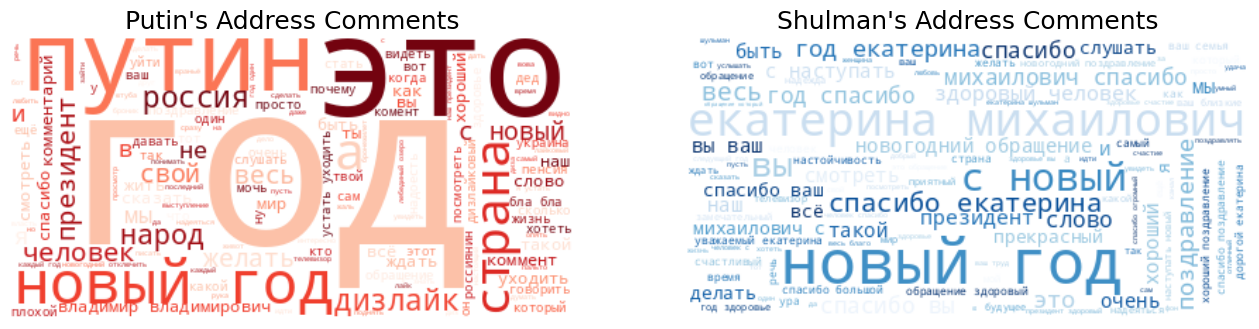

In [ ]:

putin_wordcloud = WordCloud(
    background_color='white',
    colormap='Reds'
).generate(' '.join(comments_putin_df['comment_lemmatized']))

shulman_wordcloud = WordCloud(
    background_color='white',
    colormap='Blues').generate(' '.join(comments_shulman_df['comment_lemmatized']))


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(putin_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Putin's Address Comments", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(shulman_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Shulman's Address Comments", fontsize=18)

plt.show()


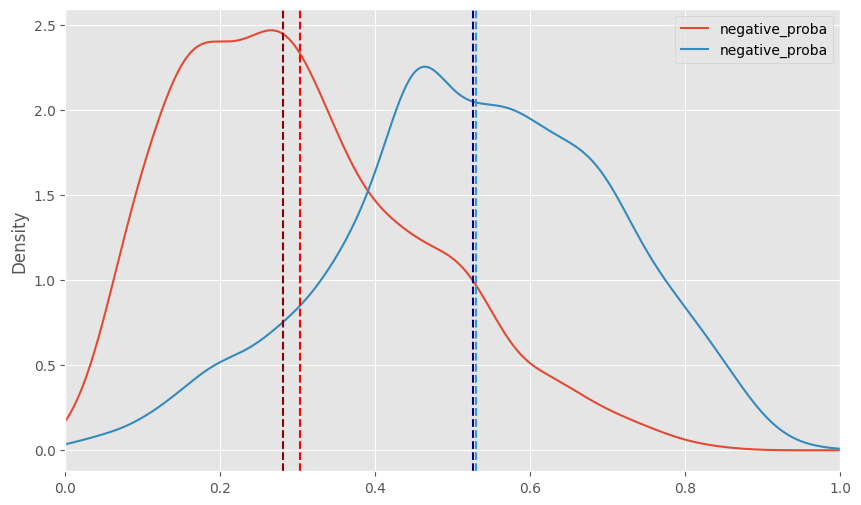

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
comments_shulman_df['negative_proba'].plot(kind='density')
comments_putin_df['negative_proba'].plot(kind='density')
plt.xlim(0,1)
plt.axvline(np.median(comments_shulman_df['negative_proba']), color = "darkred", linestyle='--')
plt.axvline(np.median(comments_putin_df['negative_proba']), color = "#3498db", linestyle='--')
plt.axvline(np.mean(comments_shulman_df['negative_proba']), color = "red", linestyle='--')
plt.axvline(np.mean(comments_putin_df['negative_proba']), color = "darkblue", linestyle='--')

plt.legend(loc=1)

The comments under Shulman's address are more positive, as the peak of the distribution is skewed towards 0, indicating mostly positive sentiment. In contrast, the comments under Putin's address have more negative sentiment, as the distribution is more centered around higher values, suggesting a stronger presence of negative comments.
Overall, this is probably true, as it aligns with the general perception of public sentiment towards both figures. The model performed quite well, effectively capturing the sentiment differences between the two sets of comments.

### Task 17 (optional).
Based on the lecture/seminar material and your own ideas, how could the training data and the classifier itself be processed to improve the quality of the model?